# Prerequisites

In [1]:
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

<ipython-input-2-107089beb3f3>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

#### Automobile sales over the years

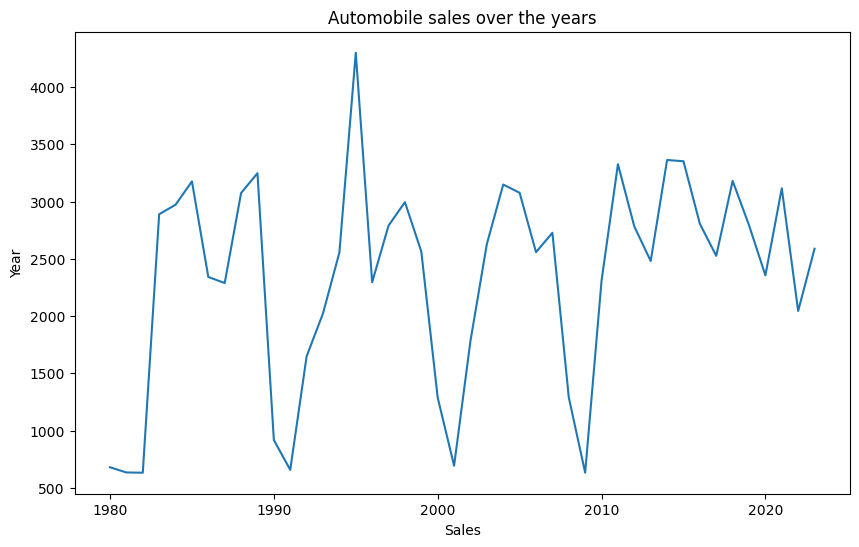

In [9]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Automobile sales over the years')
plt.show()

##### Automobile sales over the years with recession ticks

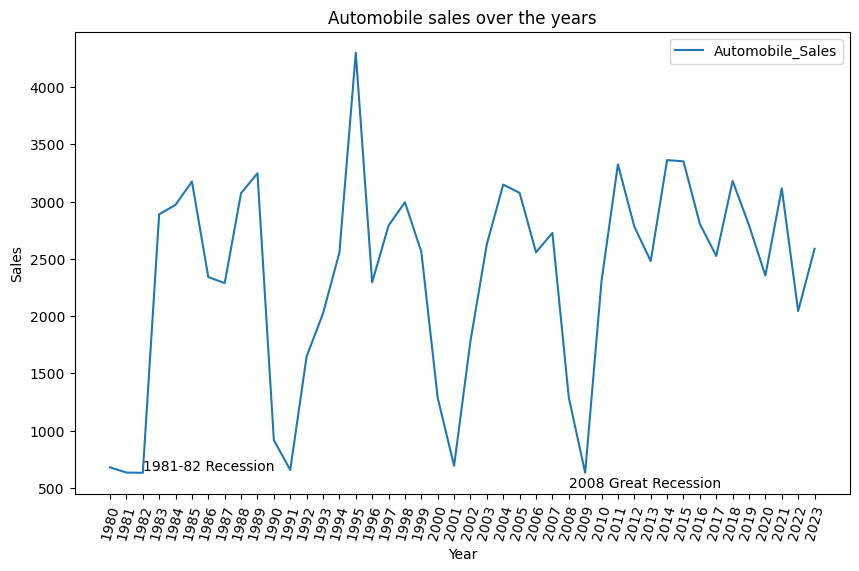

In [12]:
 plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Automobile sales over the years')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2008, 500, '2008 Great Recession')
plt.legend()
plt.show()

#### Differentiating between different vehicle types

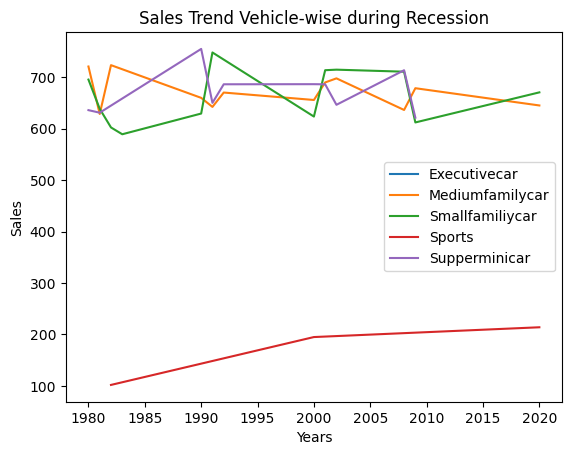

In [16]:
df_rec = df[df['Recession']==1]
df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

#### Comparing recession vs non-recession periods

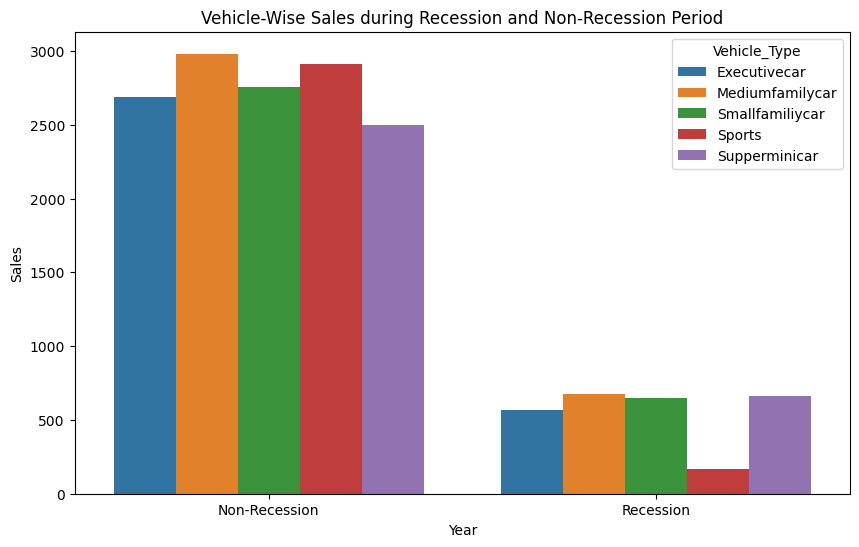

In [20]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

   
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

#### GDP

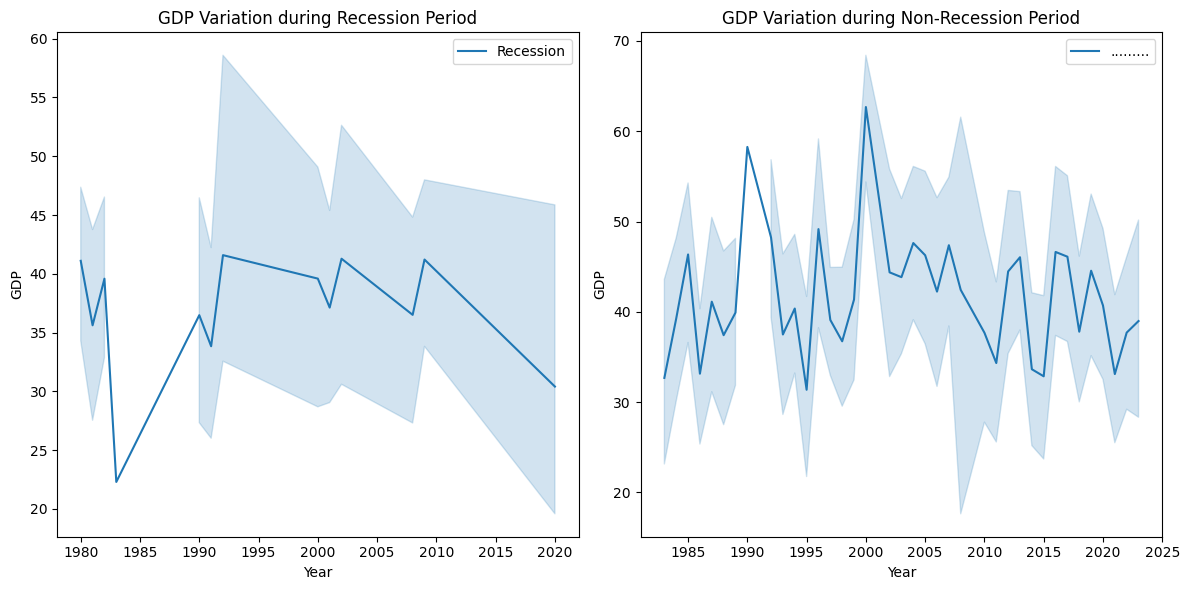

In [24]:
#Creating two data-frames for eac category
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1 ,2, 2)
    
#plt.subplot 1 for GDP
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot 2 for sales
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='.........',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

#### Alternatively, on the same graph

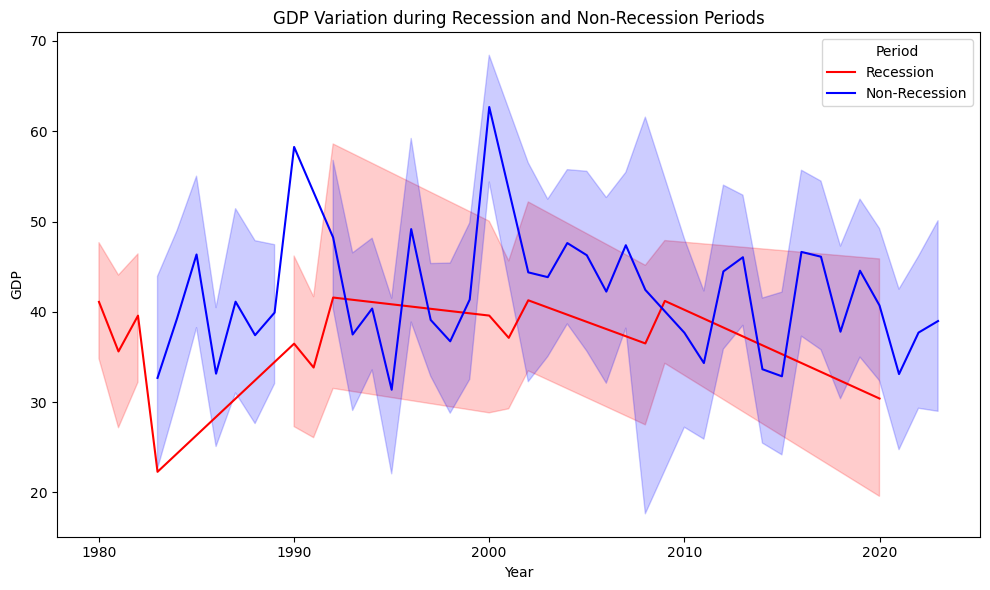

In [25]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
plt.figure(figsize=(10, 6))

# Plot GDP variation during recession
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', color='red')

# Plot GDP variation during non-recession
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', color='blue')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession and Non-Recession Periods')
plt.legend(title='Period')
plt.tight_layout()

plt.show()


#### Seasonal automobile sales

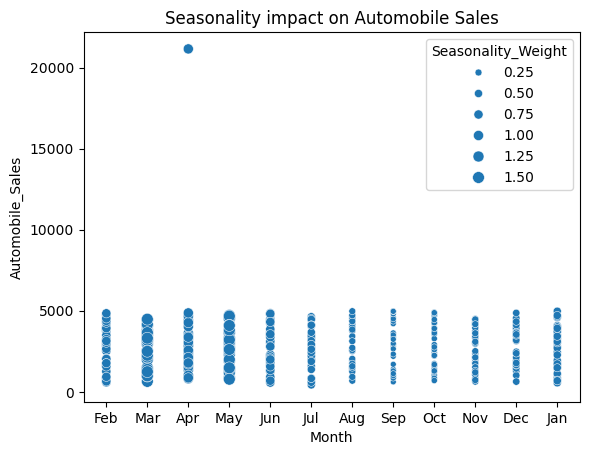

In [40]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

#### Consumer confidence and automobile sales

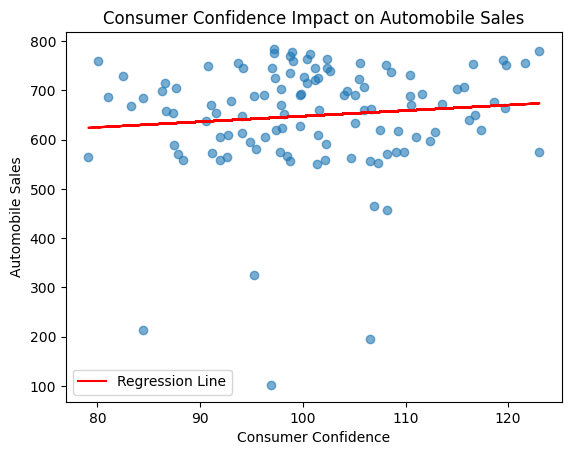

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

rec_data = df[df['Recession'] == 1]

# Scatter plot
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], alpha=0.6)

# Fit the linear regression model
X = rec_data['Consumer_Confidence'].values.reshape(-1, 1)  # Reshape to 2D array for sklearn
y = rec_data['Automobile_Sales'].values
model = LinearRegression()
model.fit(X, y)

# Predict the values for the regression line
y_pred = model.predict(X)

# Plot the regression line
plt.plot(rec_data['Consumer_Confidence'], y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence Impact on Automobile Sales')
plt.legend()

plt.show()


#### Price vs Sales during recession

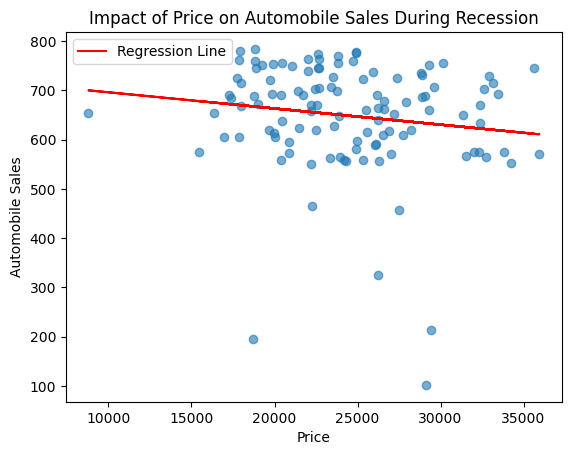

In [56]:

plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], alpha=0.6)

X = rec_data['Price'].values.reshape(-1, 1)
y = rec_data['Automobile_Sales'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(rec_data['Price'], y_pred, color='red', label='Regression Line')

plt.xlabel('Price')  
plt.ylabel('Automobile Sales')  
plt.title('Impact of Price on Automobile Sales During Recession')
plt.legend() 

plt.show()


### Advertisement Expenditure 

###### Recession vs Non-Recession

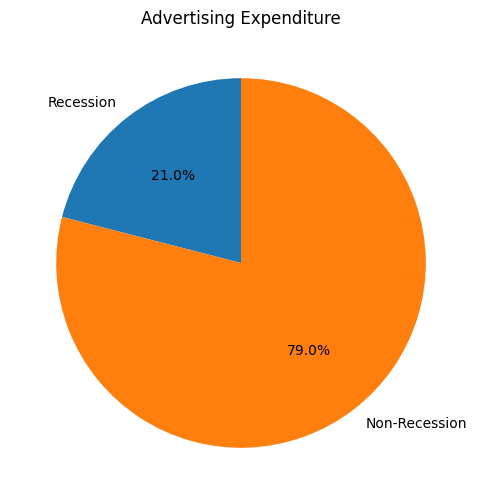

In [59]:

# Calculate the total advertising expenditure for both periods
Rtotal = rec_data['Advertising_Expenditure'].sum()
NRtotal = non_rec_data['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [Rtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure')

plt.show()

###### Advertisement expenditure on differing vehicle types during recession

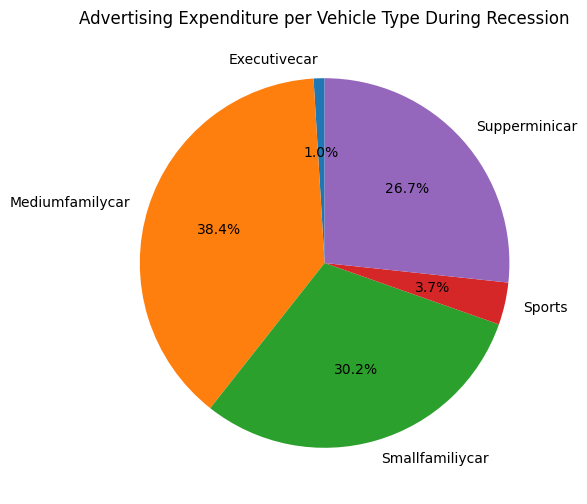

In [64]:

    # Calculate the sales volume by vehicle type during recessions
VTexpenditure = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure per Vehicle Type During Recession')

plt.show()

#### Unemployment Rate and Automobile_Sales by Vehicle Type During Recession

<ipython-input-67-c85661f8667b>:1: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',


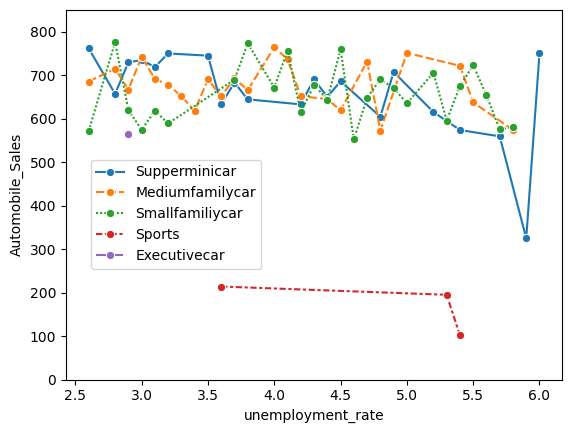

In [67]:
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [ ]:
 recession_data = data[data['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1